In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import random
import matplotlib.patches as mpatches
from itertools import count

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
edgeDF = pd.read_csv('https://raw.githubusercontent.com/batchusaisuraj/GOT_season-3/main/got-s3-edges.csv')
nodeDF = pd.read_csv('https://raw.githubusercontent.com/batchusaisuraj/GOT_season-3/main/got-s3-nodes.csv')

In [3]:
len(edgeDF.Target.unique())

101

In [5]:
G = nx.from_pandas_edgelist(edgeDF, 'Source', 'Target',['Weight'])

In [6]:
g1 = nx.Graph()
degeDF = edgeDF.reset_index()
for index, row in edgeDF.iterrows():
  g1.add_edge(row.Source, row.Target, weight = row.Weight)

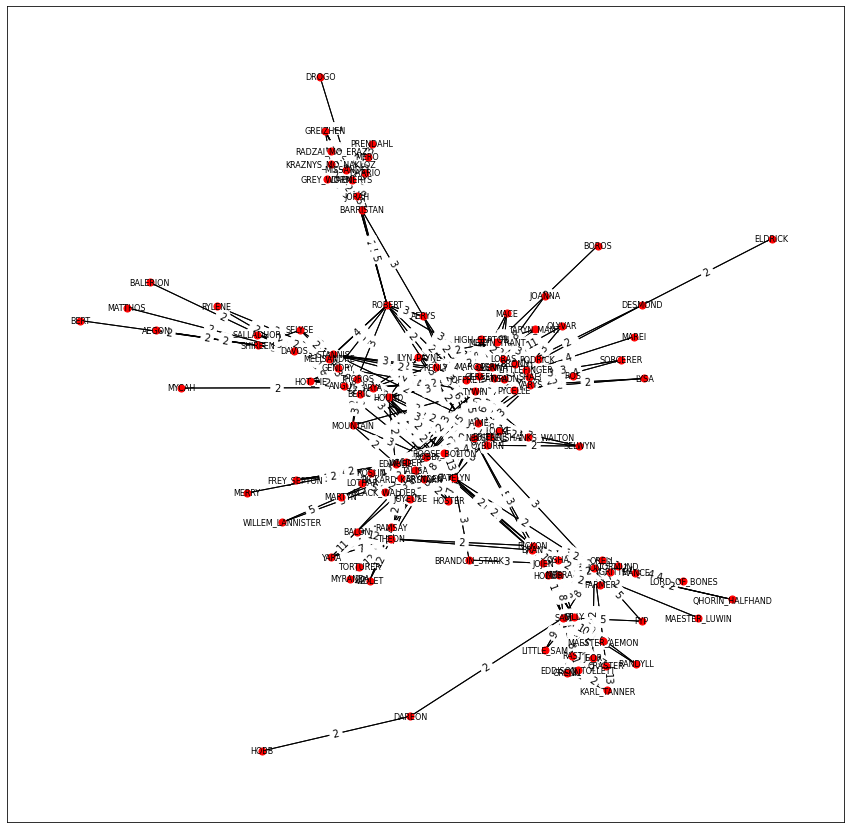

In [8]:
plt.figure(3, figsize = (15, 15))
pos = nx.fruchterman_reingold_layout(g1)

nx.draw_networkx(g1, pos = pos, node_size = 50, font_size = 8, node_color = "red")
nx.draw_networkx_edges(g1, pos = pos)
edge_labels = nx.get_edge_attributes(g1, 'weight')
nx.draw_networkx_edge_labels(g1, pos = pos, edge_labels = edge_labels)
plt.show()

In [9]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes =",str(n))
print("Number of edges =", str(m))
print("Number of connected components =", str(nx.number_connected_components(G)))

Number of nodes = 124
Number of edges = 504
Number of connected components = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


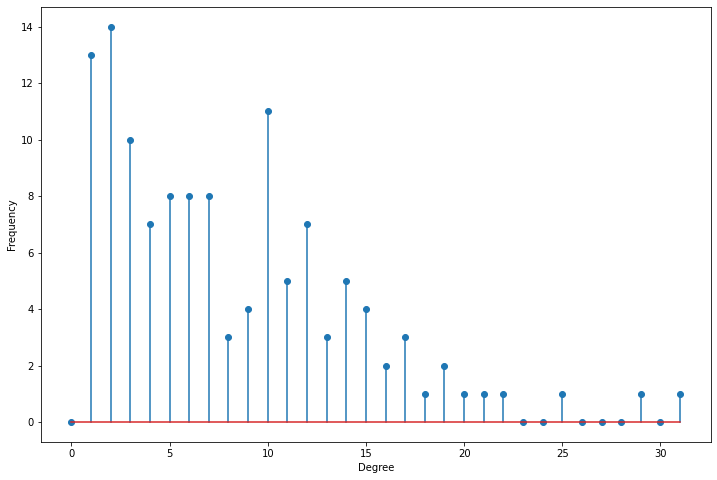

In [10]:
deg_freq = np.array(nx.degree_histogram(G)).astype('float')
plt.figure(figsize = (12, 8))
plt.stem(deg_freq)
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()


Community Detection

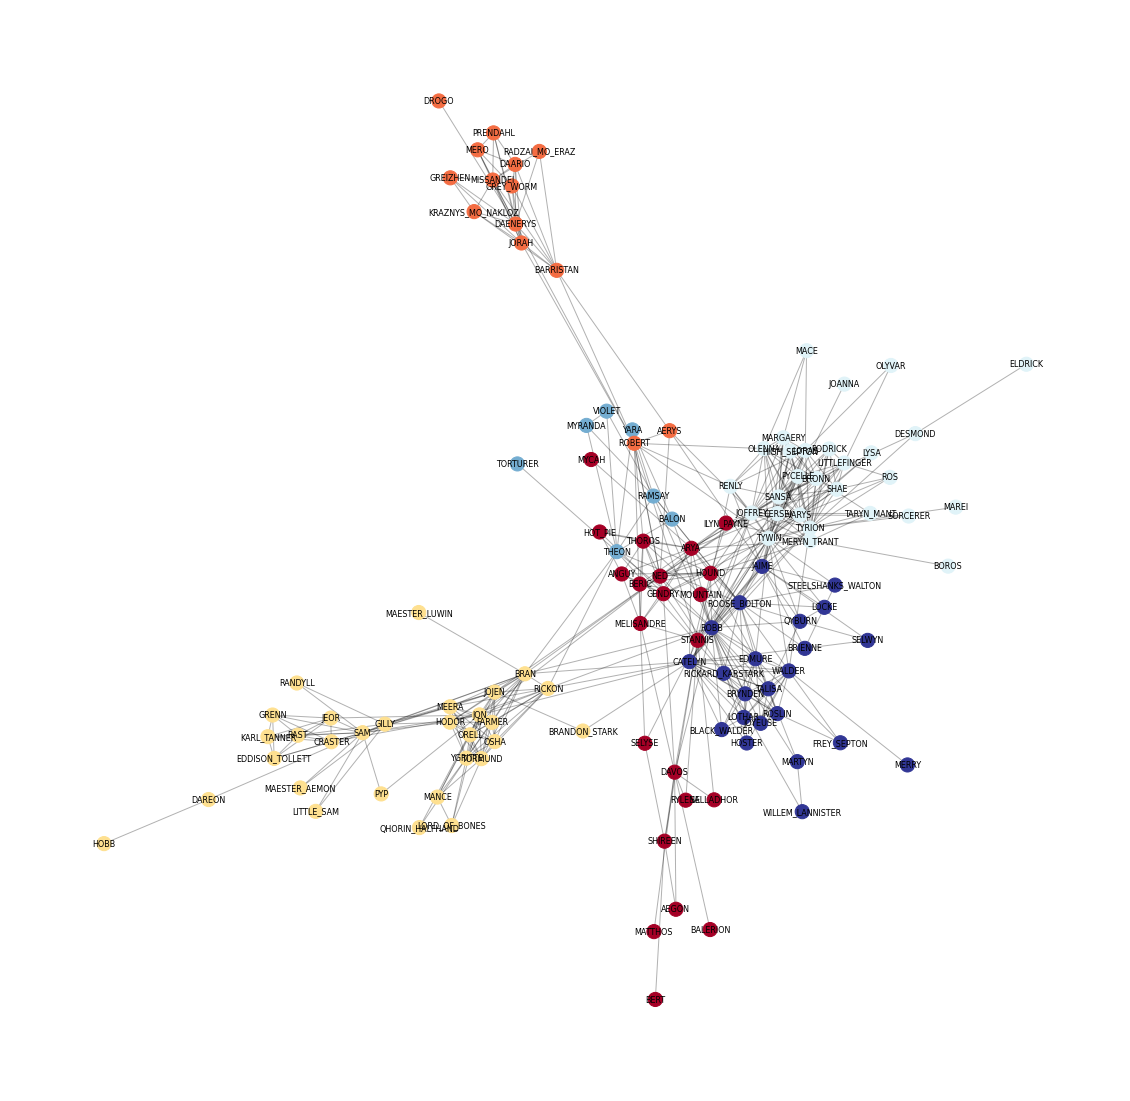

The communities detected are:
[('ARYA', 0), ('HOUND', 0), ('DAVOS', 0), ('STANNIS', 0), ('THOROS', 0), ('GENDRY', 0), ('MELISANDRE', 0), ('SHIREEN', 0), ('BERIC', 0), ('SALLADHOR', 0), ('ANGUY', 0), ('SELYSE', 0), ('HOT_PIE', 0), ('NED', 0), ('MOUNTAIN', 0), ('AEGON', 0), ('ILYN_PAYNE', 0), ('MYCAH', 0), ('BALERION', 0), ('BERT', 0), ('MATTHOS', 0), ('RYLENE', 0), ('DAENERYS', 1), ('JORAH', 1), ('MISSANDEI', 1), ('BARRISTAN', 1), ('KRAZNYS_MO_NAKLOZ', 1), ('DAARIO', 1), ('RADZAI_MO_ERAZ', 1), ('MERO', 1), ('PRENDAHL', 1), ('GREY_WORM', 1), ('ROBERT', 1), ('GREIZHEN', 1), ('AERYS', 1), ('DROGO', 1), ('JON', 2), ('YGRITTE', 2), ('GILLY', 2), ('SAM', 2), ('BRAN', 2), ('OSHA', 2), ('JOJEN', 2), ('HODOR', 2), ('ORELL', 2), ('MANCE', 2), ('TORMUND', 2), ('MEERA', 2), ('RICKON', 2), ('JEOR', 2), ('RAST', 2), ('CRASTER', 2), ('GRENN', 2), ('KARL_TANNER', 2), ('EDDISON_TOLLETT', 2), ('MAESTER_AEMON', 2), ('LITTLE_SAM', 2), ('FARMER', 2), ('PYP', 2), ('RANDYLL', 2), ('LORD_OF_BONES', 2), ('BRAND

In [11]:
import community.community_louvain as community_louvain
partition = community_louvain.best_partition(G)
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size = 200, cmap = plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_labels(G, pos, font_size = 8)
nx.draw_networkx_edges(G, pos, alpha = 0.3)
plt.show(G)

print("The communities detected are:")
print(sorted(partition.items(), key = lambda item:item[1]))

In [12]:
from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print(sorted(pgr.items(), key=itemgetter(1), reverse=True))


 sorted pagerank:

[('ROBB', 0.026377422941284003), ('TYWIN', 0.024169257323994782), ('TYRION', 0.021412948044324177), ('SAM', 0.019283747743577745), ('CATELYN', 0.01846120827271091), ('JON', 0.017275259796831054), ('JOFFREY', 0.01662174777381868), ('CERSEI', 0.01596746469144308), ('ROOSE_BOLTON', 0.015829125292336804), ('BRAN', 0.015468805524271627), ('SANSA', 0.015385077522575757), ('STANNIS', 0.014785989869202093), ('DAVOS', 0.014698719235633867), ('JAIME', 0.014601023574350466), ('ARYA', 0.014553976394320555), ('DAENERYS', 0.014119585341833975), ('WALDER', 0.013728485714505335), ('NED', 0.01334743662190841), ('EDMURE', 0.012842988637738929), ('THEON', 0.012546582555666177), ('JOJEN', 0.012530381761482273), ('LORAS', 0.01236672216741899), ('VARYS', 0.012102938549730704), ('OLENNA', 0.01206622811593022), ('HOUND', 0.011833271701576446), ('YGRITTE', 0.011725099382963487), ('MISSANDEI', 0.011472050686599244), ('BRONN', 0.011283247473782692), ('ROBERT', 0.011205693939256845), ('RICKON'

Clustering coeffient

In [13]:
print(nx.transitivity(G))


0.4810656836461126


In [14]:
local_clustering = (nx.clustering(G))
local_clustering


{'AEGON': 1.0,
 'AERYS': 0.4,
 'ANGUY': 0.8095238095238095,
 'ARYA': 0.30833333333333335,
 'BALERION': 0,
 'BALON': 0.8,
 'BARRISTAN': 0.5,
 'BERIC': 0.6071428571428571,
 'BERT': 0,
 'BLACK_WALDER': 0.8666666666666667,
 'BOROS': 0,
 'BRAN': 0.45588235294117646,
 'BRANDON_STARK': 0,
 'BRIENNE': 0.6,
 'BRONN': 0.6813186813186813,
 'BRYNDEN': 0.7272727272727273,
 'CATELYN': 0.30303030303030304,
 'CERSEI': 0.4473684210526316,
 'CRASTER': 0.8095238095238095,
 'DAARIO': 0.8571428571428571,
 'DAENERYS': 0.42424242424242425,
 'DAREON': 0,
 'DAVOS': 0.17777777777777778,
 'DESMOND': 0.3333333333333333,
 'DROGO': 0,
 'EDDISON_TOLLETT': 1.0,
 'EDMURE': 0.5142857142857142,
 'ELDRICK': 0,
 'FARMER': 1.0,
 'FREY_SEPTON': 1.0,
 'GENDRY': 0.45454545454545453,
 'GILLY': 0.3888888888888889,
 'GREIZHEN': 1.0,
 'GRENN': 1.0,
 'GREY_WORM': 0.9333333333333333,
 'HIGH_SEPTON': 1.0,
 'HOBB': 0,
 'HODOR': 0.803030303030303,
 'HOSTER': 1.0,
 'HOT_PIE': 1.0,
 'HOUND': 0.38461538461538464,
 'ILYN_PAYNE': 0.8,
 'JA

In [15]:
print(nx.average_clustering(G))


0.5966873081130292


Degree Centrality

In [16]:
from operator import itemgetter

In [17]:
degc = nx.degree_centrality(G)
# let's list the scores
dclist = sorted(degc.items(), key=itemgetter(1), reverse=True)
dclist


[('ROBB', 0.2520325203252033),
 ('TYWIN', 0.23577235772357727),
 ('TYRION', 0.20325203252032523),
 ('CATELYN', 0.1788617886178862),
 ('JOFFREY', 0.17073170731707318),
 ('CERSEI', 0.1626016260162602),
 ('JON', 0.15447154471544716),
 ('SANSA', 0.15447154471544716),
 ('ROOSE_BOLTON', 0.14634146341463417),
 ('JAIME', 0.13821138211382114),
 ('SAM', 0.13821138211382114),
 ('BRAN', 0.13821138211382114),
 ('ARYA', 0.13008130081300814),
 ('NED', 0.13008130081300814),
 ('EDMURE', 0.12195121951219513),
 ('OLENNA', 0.12195121951219513),
 ('LORAS', 0.12195121951219513),
 ('WALDER', 0.12195121951219513),
 ('HOUND', 0.11382113821138212),
 ('STANNIS', 0.11382113821138212),
 ('BRONN', 0.11382113821138212),
 ('JOJEN', 0.11382113821138212),
 ('VARYS', 0.11382113821138212),
 ('YGRITTE', 0.10569105691056911),
 ('RICKON', 0.10569105691056911),
 ('PYCELLE', 0.10569105691056911),
 ('TALISA', 0.0975609756097561),
 ('DAENERYS', 0.0975609756097561),
 ('MARGAERY', 0.0975609756097561),
 ('HODOR', 0.097560975609756

Betweenness Centrality

In [18]:
bet = nx.betweenness_centrality(G)
# let's list the scores
bclist = sorted(bet.items(), key=itemgetter(1), reverse=True)
bclist


[('ROBB', 0.2381163571332072),
 ('NED', 0.17455490693263),
 ('ROBERT', 0.1612072816209624),
 ('BRAN', 0.14802295374376237),
 ('JON', 0.13598714263346537),
 ('TYWIN', 0.12858396569237646),
 ('CATELYN', 0.12351544108875671),
 ('SAM', 0.10217883119508575),
 ('TYRION', 0.09865173199290381),
 ('STANNIS', 0.07693211332651917),
 ('DAVOS', 0.06436231041974806),
 ('DAENERYS', 0.060330053624445844),
 ('THEON', 0.05132951410087927),
 ('ARYA', 0.045507869163535636),
 ('JAIME', 0.04352305667958167),
 ('BARRISTAN', 0.03945442739761971),
 ('JORAH', 0.038236080423543206),
 ('JOFFREY', 0.03617231071495405),
 ('JOJEN', 0.034989786872416925),
 ('SANSA', 0.034004295414440396),
 ('RICKON', 0.03234004313844823),
 ('ROOSE_BOLTON', 0.03164817844782274),
 ('WALDER', 0.030758584085257428),
 ('GILLY', 0.023611038790388835),
 ('AERYS', 0.023127571468933652),
 ('VARYS', 0.021300228245230736),
 ('HOUND', 0.01944289767853726),
 ('CERSEI', 0.018803524665905846),
 ('OLENNA', 0.01858805719832741),
 ('MERYN_TRANT', 0.01

Closeness Centrality


In [19]:
clos = nx.closeness_centrality(G)
# let's list the scores
cclist = sorted(clos.items(), key=itemgetter(1), reverse=True)
cclist


[('ROBB', 0.4785992217898833),
 ('NED', 0.45555555555555555),
 ('CATELYN', 0.4522058823529412),
 ('TYWIN', 0.4489051094890511),
 ('JOFFREY', 0.4241379310344828),
 ('JAIME', 0.41694915254237286),
 ('TYRION', 0.41694915254237286),
 ('BRAN', 0.412751677852349),
 ('STANNIS', 0.40728476821192056),
 ('SANSA', 0.40594059405940597),
 ('ROOSE_BOLTON', 0.40327868852459015),
 ('ARYA', 0.3954983922829582),
 ('ROBERT', 0.3954983922829582),
 ('VARYS', 0.3929712460063898),
 ('HOUND', 0.39171974522292996),
 ('WALDER', 0.39171974522292996),
 ('JON', 0.3904761904761905),
 ('EDMURE', 0.38801261829652994),
 ('RICKON', 0.375),
 ('RICKARD_KARSTARK', 0.36936936936936937),
 ('THEON', 0.36826347305389223),
 ('JOJEN', 0.3649851632047478),
 ('AERYS', 0.36283185840707965),
 ('MOUNTAIN', 0.36283185840707965),
 ('DAVOS', 0.36176470588235293),
 ('THOROS', 0.36176470588235293),
 ('QYBURN', 0.36176470588235293),
 ('CERSEI', 0.36070381231671556),
 ('GENDRY', 0.35446685878962536),
 ('RENLY', 0.3524355300859599),
 ('OLEN

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
import matplotlib.patches as mpatches
import random
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from itertools import count 

In [21]:
# Class to perform spectral clustering for k clusters, given k

class SpectralClustering:
    
    def __init__(self, G):
        # Initialize the graph, nodes and the normalized Laplacian

        self.graph = G
        self.normalized_laplacian = nx.linalg.normalized_laplacian_matrix(G).toarray()
        self.nodes = G.nodes()

    def compute_eigenspace(self):
        # Compute the eigenvalues and the eigenvectors using Numpy and sort them in ascending order 

        eigenvalues, eigenvectors = np.linalg.eig(self.normalized_laplacian)

        sort_index = np.argsort(eigenvalues) # Returns the list of indices that would sort the array
        sorted_eigenvectors = eigenvectors[:, sort_index]

        return sorted_eigenvectors

    def fit(self, k):
        """
        Step 1: Extract the k eigen vectors and stack them vertically to form a matrix (i.e each vector is a column)
        Step 2: Every row of this matrix represents the features of the respective nodes of the graph
        Step 3: Perform K-Means clustering on this dataset to identify k clusters

        """
        eigenvectors = self.compute_eigenspace()
        k_eigenvectors = np.array(eigenvectors)[:,:k]
        dataset = pd.DataFrame(k_eigenvectors, index=self.nodes)

        # print(dataset)

        k_means_clusters = KMeans(n_clusters = k, random_state=42)
        self.clusters = k_means_clusters.fit(k_eigenvectors)
        
    def predict_labels(self):
        # Returns the labels 
        return self.clusters.labels_

    def assign_labels(self, labels):
        # Helper to assign the labels as node attributes
        for i,node in enumerate(self.graph.nodes()):
            self.graph.nodes[node]['label'] = labels[i]

    def plot_graph(self, n_clusters, title='Graph after Spectral Clustering'):
        # Plots the graph 

        labels = self.clusters.labels_
        self.assign_labels(labels)

        colour_list = ['blue','green','red','yellow','cyan', 'magenta','lightblue','grey']
        sampled_colours = dict(zip(set(labels),random.sample(colour_list, n_clusters)))

        legend_handles = []
        for label, color in sampled_colours.items():
            colour_handle = mpatches.Patch(color=color, label=label)
            legend_handles.append(colour_handle)

        colours = [sampled_colours[i] for i in labels]

        pos_fr = nx.fruchterman_reingold_layout(self.graph)
        plt.figure(figsize=(20,20))
        plt.title(title)
        plt.legend(handles=legend_handles)
        nx.draw(self.graph, pos=pos_fr, node_size=500, node_color=colours, with_labels=True)
        plt.show()

In [24]:
G

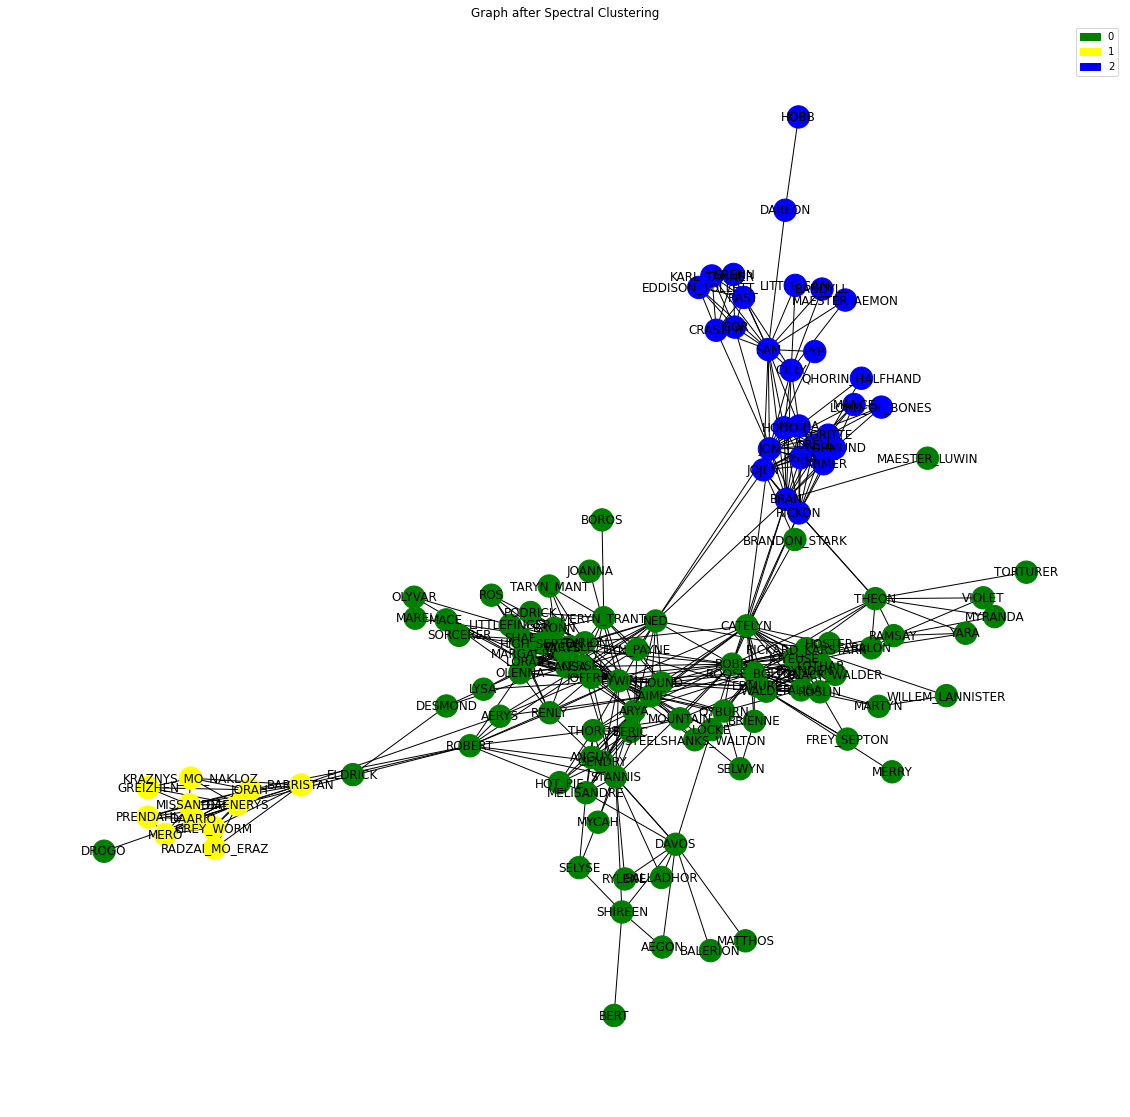

In [27]:
# Performing Spectral Clustering on the graph
k = 3
SpecClust = SpectralClustering(G)
SpecClust.fit(k)
clustering_labels = SpecClust.predict_labels()
# print(labels)

for i,node in enumerate(G.nodes()):
    G.nodes[node]['label'] = clustering_labels[i]

colour_map = ['']*len(clustering_labels)
for i, label in enumerate(clustering_labels):
    if label == 0:
        colour_map[i] = 'lightgreen'
    else:
        colour_map[i] = "red"

# nx.draw(CG, with_labels=True, node_color=colour_map)
SpecClust.plot_graph(k, title="Graph after Spectral Clustering")

In [28]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [29]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes =", str(n))
print("Number of edges =", str(m))
print("Number of connected components =", str(nx.number_connected_components(G)))

Number of nodes = 124
Number of edges = 504
Number of connected components = 1


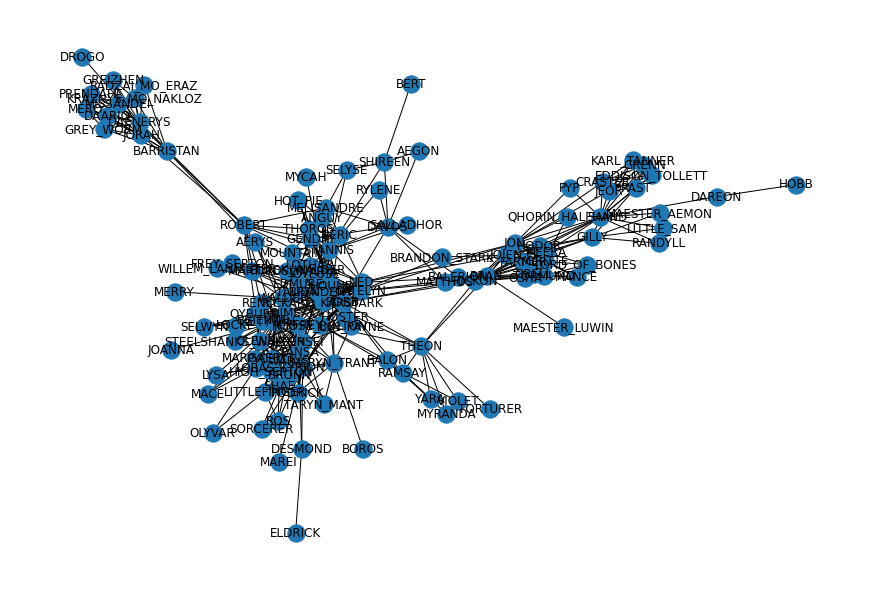

In [30]:
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels = True)

In [31]:
# take a random sample of edges

proportion_edges = 0.25
edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))

# remove some edges. the goal is to try and repredict these edges, and measure how close the prediction is to the original.

G_train = G.copy()
G_train.remove_edges_from(edge_subset)

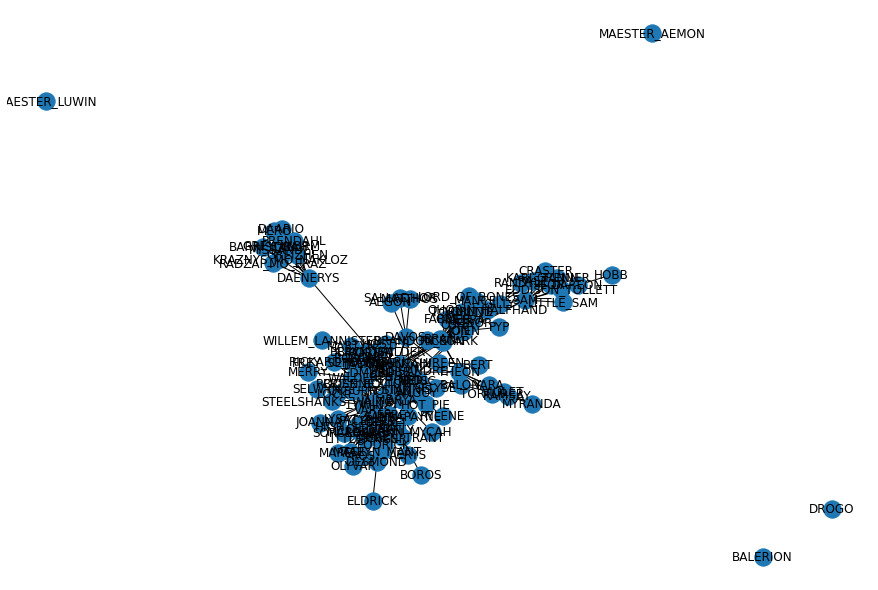

In [32]:
plt.figure(figsize=(12, 8))
nx.draw(G_train, with_labels = True)

In [33]:
edge_subset_size = len(list(edge_subset))
print("Deleted edges =", str(edge_subset_size))
print("Remaining edges =", str(m - edge_subset_size))

# just printing the edge_subset.
print(edge_subset)

Deleted edges = 126
Remaining edges = 378
[('LORAS', 'RENLY'), ('TYWIN', 'RENLY'), ('DAENERYS', 'DAARIO'), ('SANSA', 'PODRICK'), ('RAMSAY', 'THEON'), ('BERIC', 'NED'), ('DAVOS', 'STANNIS'), ('TORMUND', 'MEERA'), ('RAST', 'GRENN'), ('SHIREEN', 'SELYSE'), ('OLENNA', 'RENLY'), ('TORMUND', 'FARMER'), ('HODOR', 'FARMER'), ('WALDER', 'HOSTER'), ('STANNIS', 'RENLY'), ('JOFFREY', 'PYCELLE'), ('WALDER', 'BRYNDEN'), ('EDMURE', 'ROSLIN'), ('CERSEI', 'HIGH_SEPTON'), ('GILLY', 'BRAN'), ('JON', 'FARMER'), ('THEON', 'MYRANDA'), ('RICKARD_KARSTARK', 'NED'), ('YGRITTE', 'MEERA'), ('LORAS', 'PYCELLE'), ('BRAN', 'MAESTER_LUWIN'), ('TYRION', 'LITTLEFINGER'), ('SAM', 'RAST'), ('ROOSE_BOLTON', 'BALON'), ('TYWIN', 'STANNIS'), ('DAVOS', 'RYLENE'), ('TALISA', 'LOTHAR'), ('YGRITTE', 'FARMER'), ('EDMURE', 'JOYEUSE'), ('BARRISTAN', 'AERYS'), ('EDMURE', 'LOTHAR'), ('HOUND', 'BERIC'), ('SAM', 'PYP'), ('NED', 'AERYS'), ('TYWIN', 'MOUNTAIN'), ('THEON', 'RICKARD_KARSTARK'), ('HOUND', 'NED'), ('JORAH', 'BARRISTAN'), ('

Proximity based approach

Jaccard Coefficient

In [34]:
# calculating jaccard coefficient for all the node pairs in G_train.

prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])

In [35]:
# binary classification here. taking various thresholds for the jaccard coefficient.
# calculating fpr, tpr, and auc values for various thresholds of the jaccard coefficient.

fpr_jaccard, tpr_jaccard, thresholds_jaccard = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)

In [36]:
auc_jaccard

0.8496613160350592

Adamic-Adar similarrity

In [37]:
prediction_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])

In [38]:
fpr_adamic, tpr_adamic, thresholds_adamic = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)

Preferential Attachment

In [39]:
prediction_pref = list(nx.preferential_attachment(G_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_pref])

In [40]:
fpr_pref, tpr_pref, thresholds_pref = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)

ROC AUC Curve

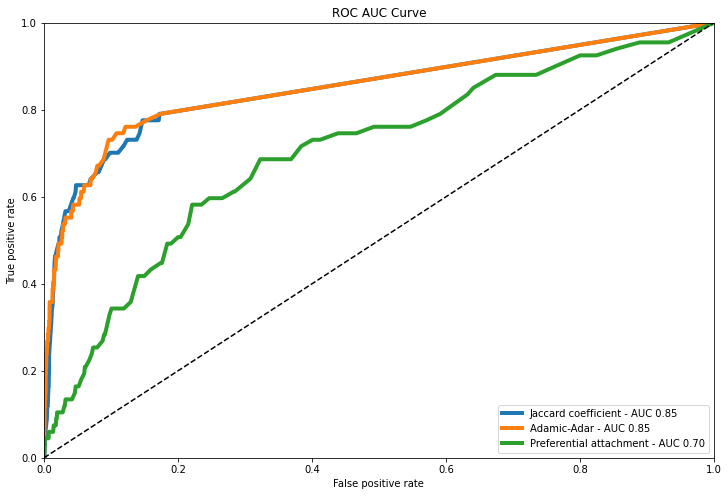

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

Best Performance

In [42]:
# the best performance coefficient might vary in some cases.
# however, in this particular case, it is clear from the auc, that the Adamic-Adar test performs the best.

optimal_idx = np.argmax(tpr_adamic - fpr_adamic)
optimal_threshold = thresholds_adamic[optimal_idx]
print("Optimal threshold =", optimal_threshold)

# this is the threshold value above which a link will be classified as existant, and below which a link will be classified as non-existant.

Optimal threshold = 0.3459762562611936


Link Prediction Using GraphML

In [43]:
!pip install torch-scatter
!pip install torch-sparse
!pip install torch-cluster
!pip install torch-spline-conv
!pip install torch-geometric

  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=279639 sha256=1ce908c3c093092ba20368d34dc661ef415f08805c8c570881fb2328da89ac6f
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-scatter
     |████████████████████████████████| 48 kB 4.6 MB/s 
  Created wheel for torch-sparse: filename=torch_sparse-0.6.13-cp37-cp37m-linux_x86_64.whl size=501789 sha256=7a1b674eb9b287eee26fc03e2373e11877e40d5ae846848d5555557dd8e99657
  Stored in directory: /root/.cache/pip/wheels/e0/01/be/6b2966e0ff20bb023ae35e5d17903e6e5b4df46dd5892f6be6
Successfully built torch-sparse
     |████████████████████████████████| 43 kB 1.7 MB/s 
  Created wheel for torch-cluster: filename=torch_cluster-1.6.0-cp37-cp37m-linux_x86_64.whl size=309643 sha256=569ee8b9f40ad7ce68fc3fbbf90b47c9f54412c0dbf660c55fcb56cf28d6a058
  Stored in directory: /root/.cache/pip/wheels/bc/c7/3e/258dd72b35d7a459264143ad5b

In [44]:
import torch
from torch_geometric.utils.convert import from_networkx

GCN

In [45]:
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

     |████████████████████████████████| 435 kB 23.0 MB/s 
     |████████████████████████████████| 482 kB 41.4 MB/s 
     |████████████████████████████████| 462 kB 41.4 MB/s 
     |████████████████████████████████| 41 kB 446 kB/s 


In [46]:
# verify that we're using the correct version of StellarGraph for this notebook
import stellargraph as sg

try:
    sg.utils.validate_notebook_version("1.2.1")
except AttributeError:
    raise ValueError(
        f"This notebook requires StellarGraph version 1.2.1, but a different version {sg.__version__} is installed.  Please see <https://github.com/stellargraph/stellargraph/issues/1172>."
    ) from None

In [47]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [48]:
ls

sample_data/
